In [1]:
import os
import sklearn as sk
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

------------------------------------------

In [8]:
df.isnull().mean().sort_values(ascending=False)[:10]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
GarageCond     0.055479
GarageType     0.055479
dtype: float64

In [9]:
# drop columns having NaN more than 45%
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
df.drop(columns, axis=1, inplace=True)
df_test.drop(columns, axis=1, inplace=True)

In [10]:
df.shape[1]

75

--------------------

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64
Skewness: 1.8828757597682129 // Kurtosis: 6.536281860064529


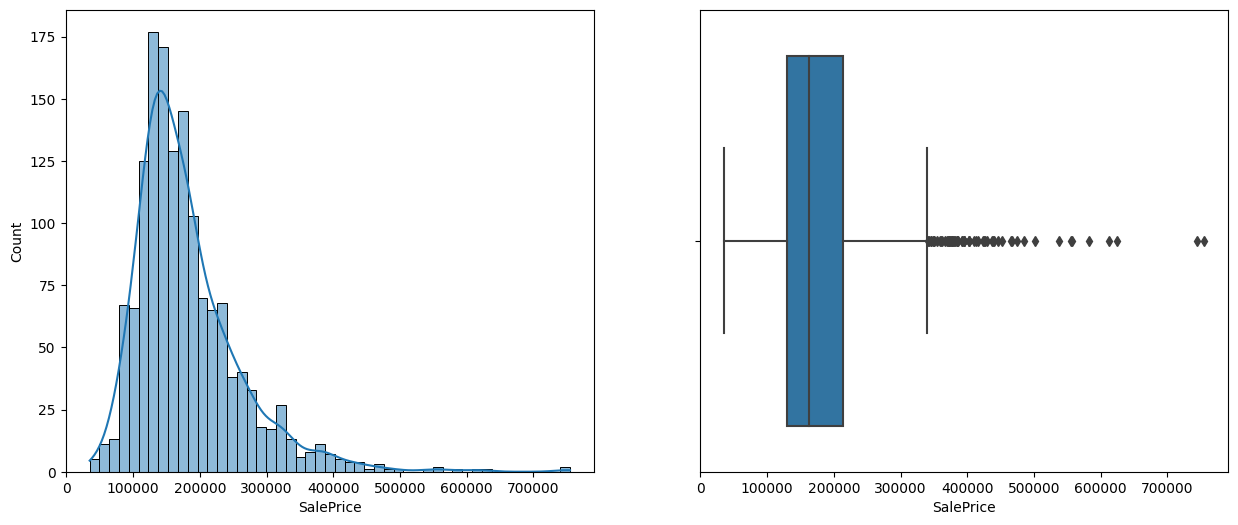

In [11]:
# check target distribution
print(df.SalePrice.value_counts(dropna=False))
print(f"Skewness: {df.SalePrice.skew()} // Kurtosis: {df.SalePrice.kurt()}")

f, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=df, x='SalePrice', kde=True, ax=ax[0])
sns.boxplot(data=df, x='SalePrice', ax=ax[1])
plt.show()

*No NaN values, Right skewed. // Not have high values of both skewness and kurtosis.*

In [12]:
df.SalePrice.median()

163000.0

In [13]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
# Classify features based on type - numerical/categorical
categoricals = list(df.select_dtypes(include='object').columns)
categoricals.extend(['OverallQual', 'OverallCond'])
numericals = df.select_dtypes(include=['int', 'float']).columns
numericals = numericals.drop(['SalePrice', 'Id', 'OverallQual', 'OverallCond'])

In [16]:
print(f"Categorical features: {len(categoricals)}\nNumerical features: {len(numericals)}")

Categorical features: 39
Numerical features: 34


---------------------

### ***Numerical columns***

In [17]:
df[numericals].describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [18]:
# Skewness and Kurtosis(check outliers)
sk_table = pd.DataFrame([[df[x].skew(), df[x].kurt()] for x in numericals], columns=['skewness', 'kurtosis'], index=list(numericals.values))
sk_table

,skewness,kurtosis
MSSubClass,1.407657,1.580188
LotFrontage,2.163569,17.452867
LotArea,12.207688,203.243271
YearBuilt,-0.613461,-0.439552
YearRemodAdd,-0.503562,-1.272245
MasVnrArea,2.669084,10.082417
BsmtFinSF1,1.685503,11.118236
BsmtFinSF2,4.255261,20.113338
BsmtUnfSF,0.920268,0.474994
TotalBsmtSF,1.524255,13.250483


In [19]:
sk_list = list(sk_table[sk_table['skewness'] > 3].index)
ku_list = list(sk_table[sk_table['kurtosis'] > 10].index)

Some features have large skewness or kurtosis value.   
>- *Skewness: LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal*
>- *Kurtosis: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal*     

Before removing outliers, I'll see distributions of those.

In [20]:
sk_ku_list = list(set(sk_list).union(ku_list))

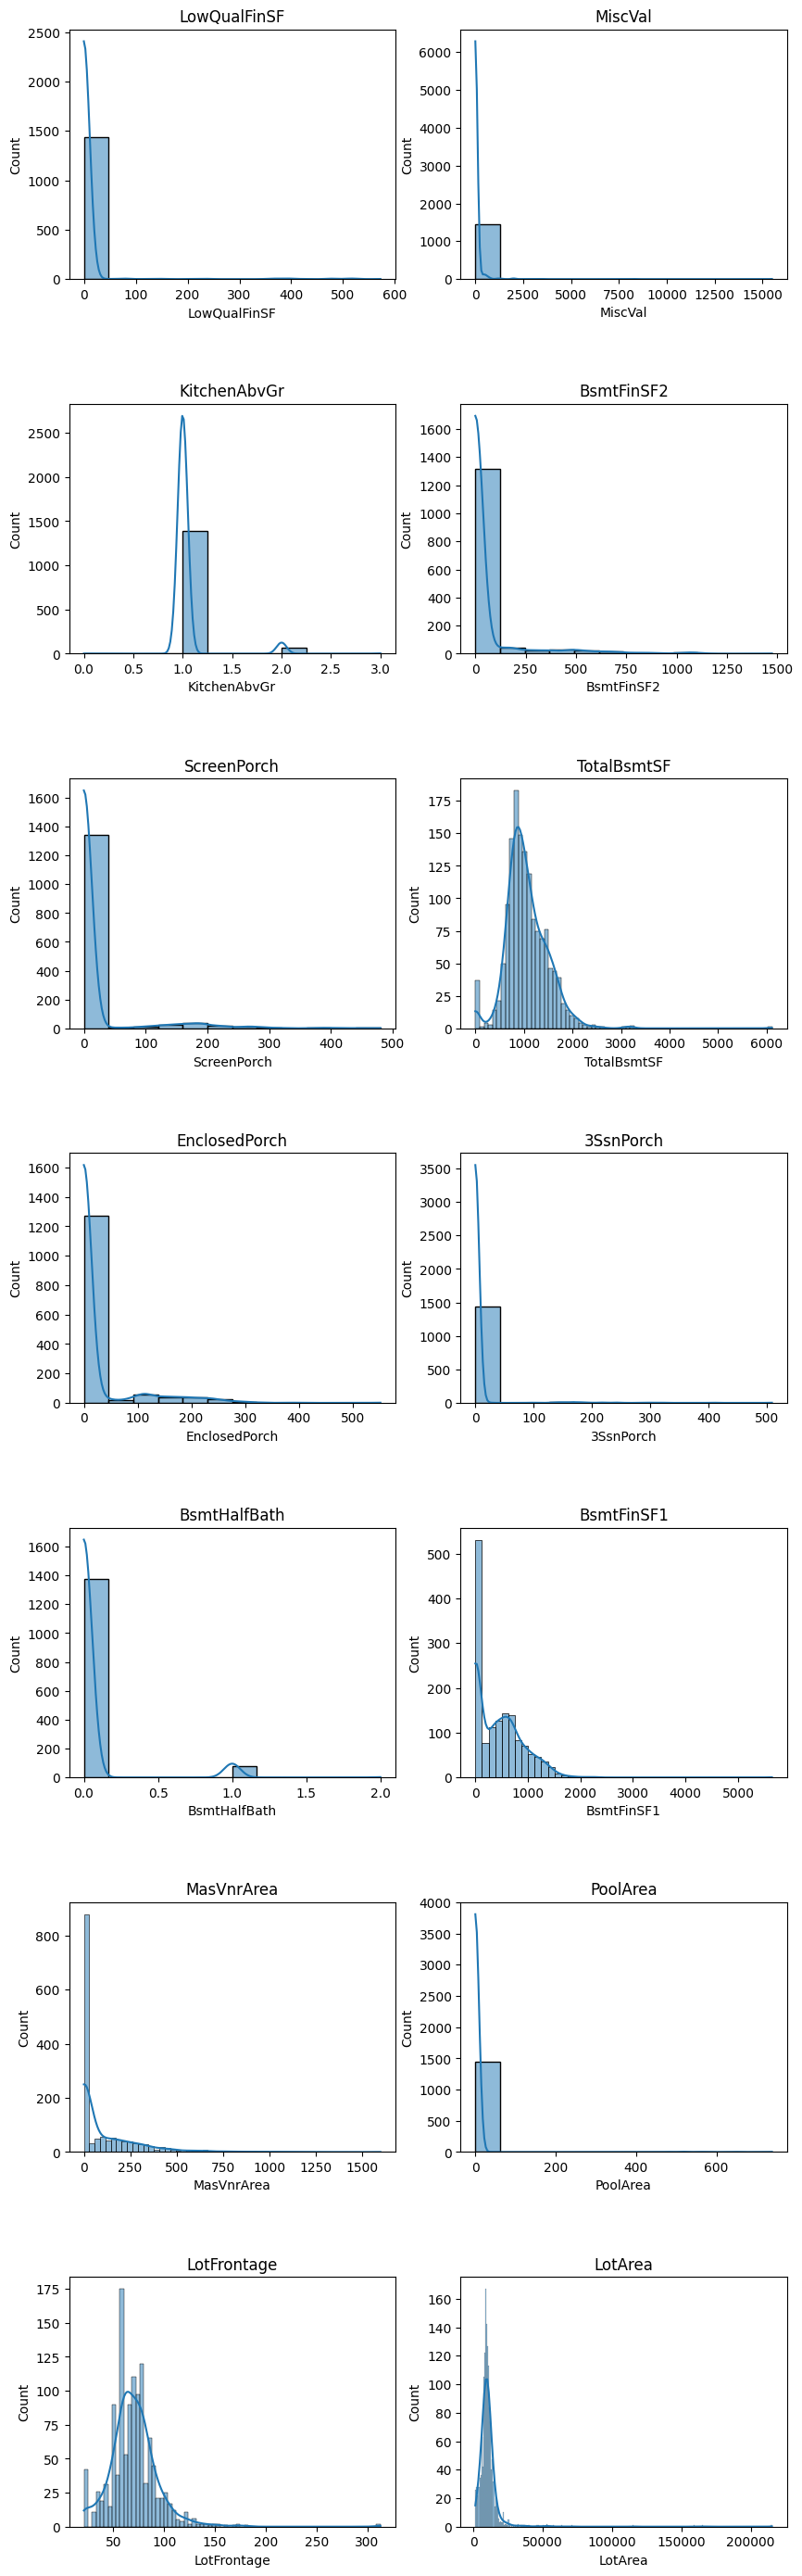

In [21]:
f, ax = plt.subplots(math.ceil(len(sk_ku_list) / 2), 2, figsize=(10, math.ceil(len(sk_ku_list) // 2) * 5))

for idx, k in enumerate(sk_ku_list):
    a, b = divmod(idx, 2)
    sns.histplot(data=df, x=k, kde=True, ax=ax[a, b])
    ax[a, b].set_title(f"{k}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In some features, almost all values are 0. I'll drop those features first, and then remove outliers of other features.

In [22]:
numericals = numericals.drop(['ScreenPorch', 'KitchenAbvGr', 'MiscVal', 'BsmtFinSF2', 'PoolArea', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'BsmtHalfBath'])
sk_ku_list = [x for x in sk_ku_list if x not in ['ScreenPorch', 'KitchenAbvGr', 'MiscVal', 'BsmtFinSF2', 'PoolArea', 'EnclosedPorch', 'LowQualFinSF', '3SsnPorch', 'BsmtHalfBath']]

In [23]:
for x in sk_ku_list:
    df[x] = np.log1p(df[x])
    df_test[x] = np.log1p(df_test[x])

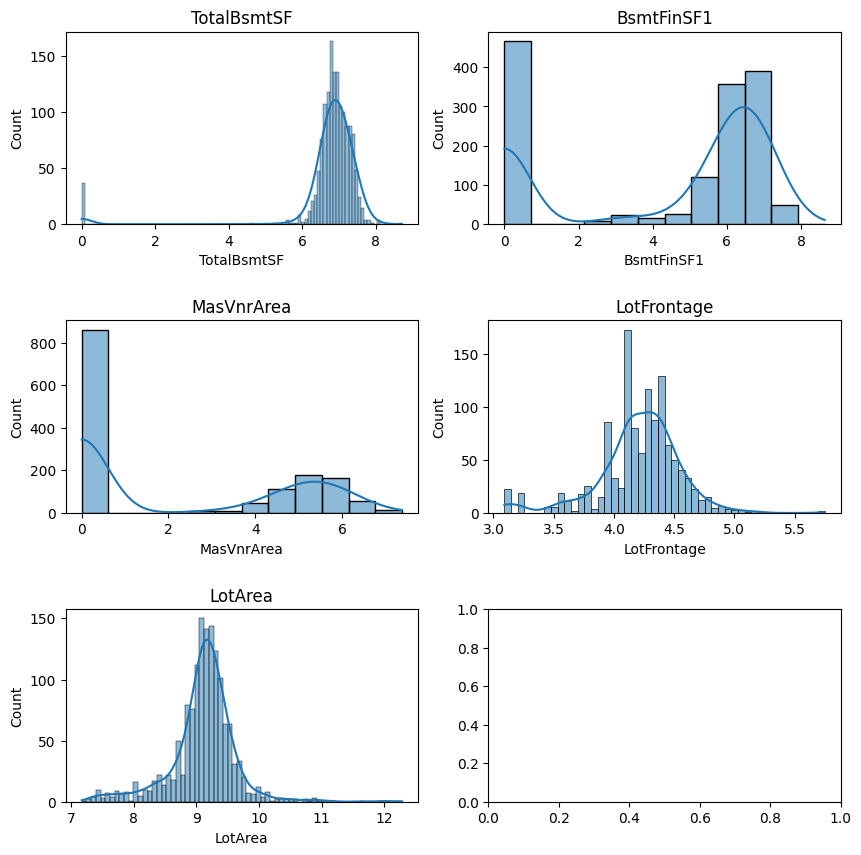

In [24]:
f, ax = plt.subplots(math.ceil(len(sk_ku_list) / 2), 2, figsize=(10, math.ceil(len(sk_ku_list) // 2) * 5))

for idx, k in enumerate(sk_ku_list):
    a, b = divmod(idx, 2)
    sns.histplot(data=df, x=k, kde=True, ax=ax[a, b])
    ax[a, b].set_title(f"{k}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [25]:
# Skewness and Kurtosis(check outliers)
sk_table = pd.DataFrame([[df[x].skew(), df[x].kurt()] for x in sk_ku_list], columns=['skewness', 'kurtosis'], index=sk_ku_list)
sk_table

,skewness,kurtosis
TotalBsmtSF,-5.154670,27.739670
BsmtFinSF1,-0.618410,-1.476786
MasVnrArea,0.494418,-1.629236
LotFrontage,-0.728728,2.309463
LotArea,-0.137404,4.713822


             var1          var2      corr
495    GarageArea    GarageCars  0.882475
93    GarageYrBlt     YearBuilt  0.825667
291     GrLivArea  TotRmsAbvGrd  0.825489
27        LotArea   LotFrontage  0.744489
261      2ndFlrSF     GrLivArea  0.687501
391  BedroomAbvGr  TotRmsAbvGrd  0.676620
118   GarageYrBlt  YearRemodAdd  0.642277
288      FullBath     GrLivArea  0.630012
266      2ndFlrSF  TotRmsAbvGrd  0.616423
264      2ndFlrSF      HalfBath  0.609707
79      YearBuilt  YearRemodAdd  0.592855
162    BsmtFinSF1  BsmtFullBath  0.591148
469    GarageCars   GarageYrBlt  0.588920
236      1stFlrSF     GrLivArea  0.566024
470    GarageArea   GarageYrBlt  0.564567
341      FullBath  TotRmsAbvGrd  0.554784
94     GarageCars     YearBuilt  0.537850
290  BedroomAbvGr     GrLivArea  0.521270
265      2ndFlrSF  BedroomAbvGr  0.502901
245      1stFlrSF    GarageArea  0.489782


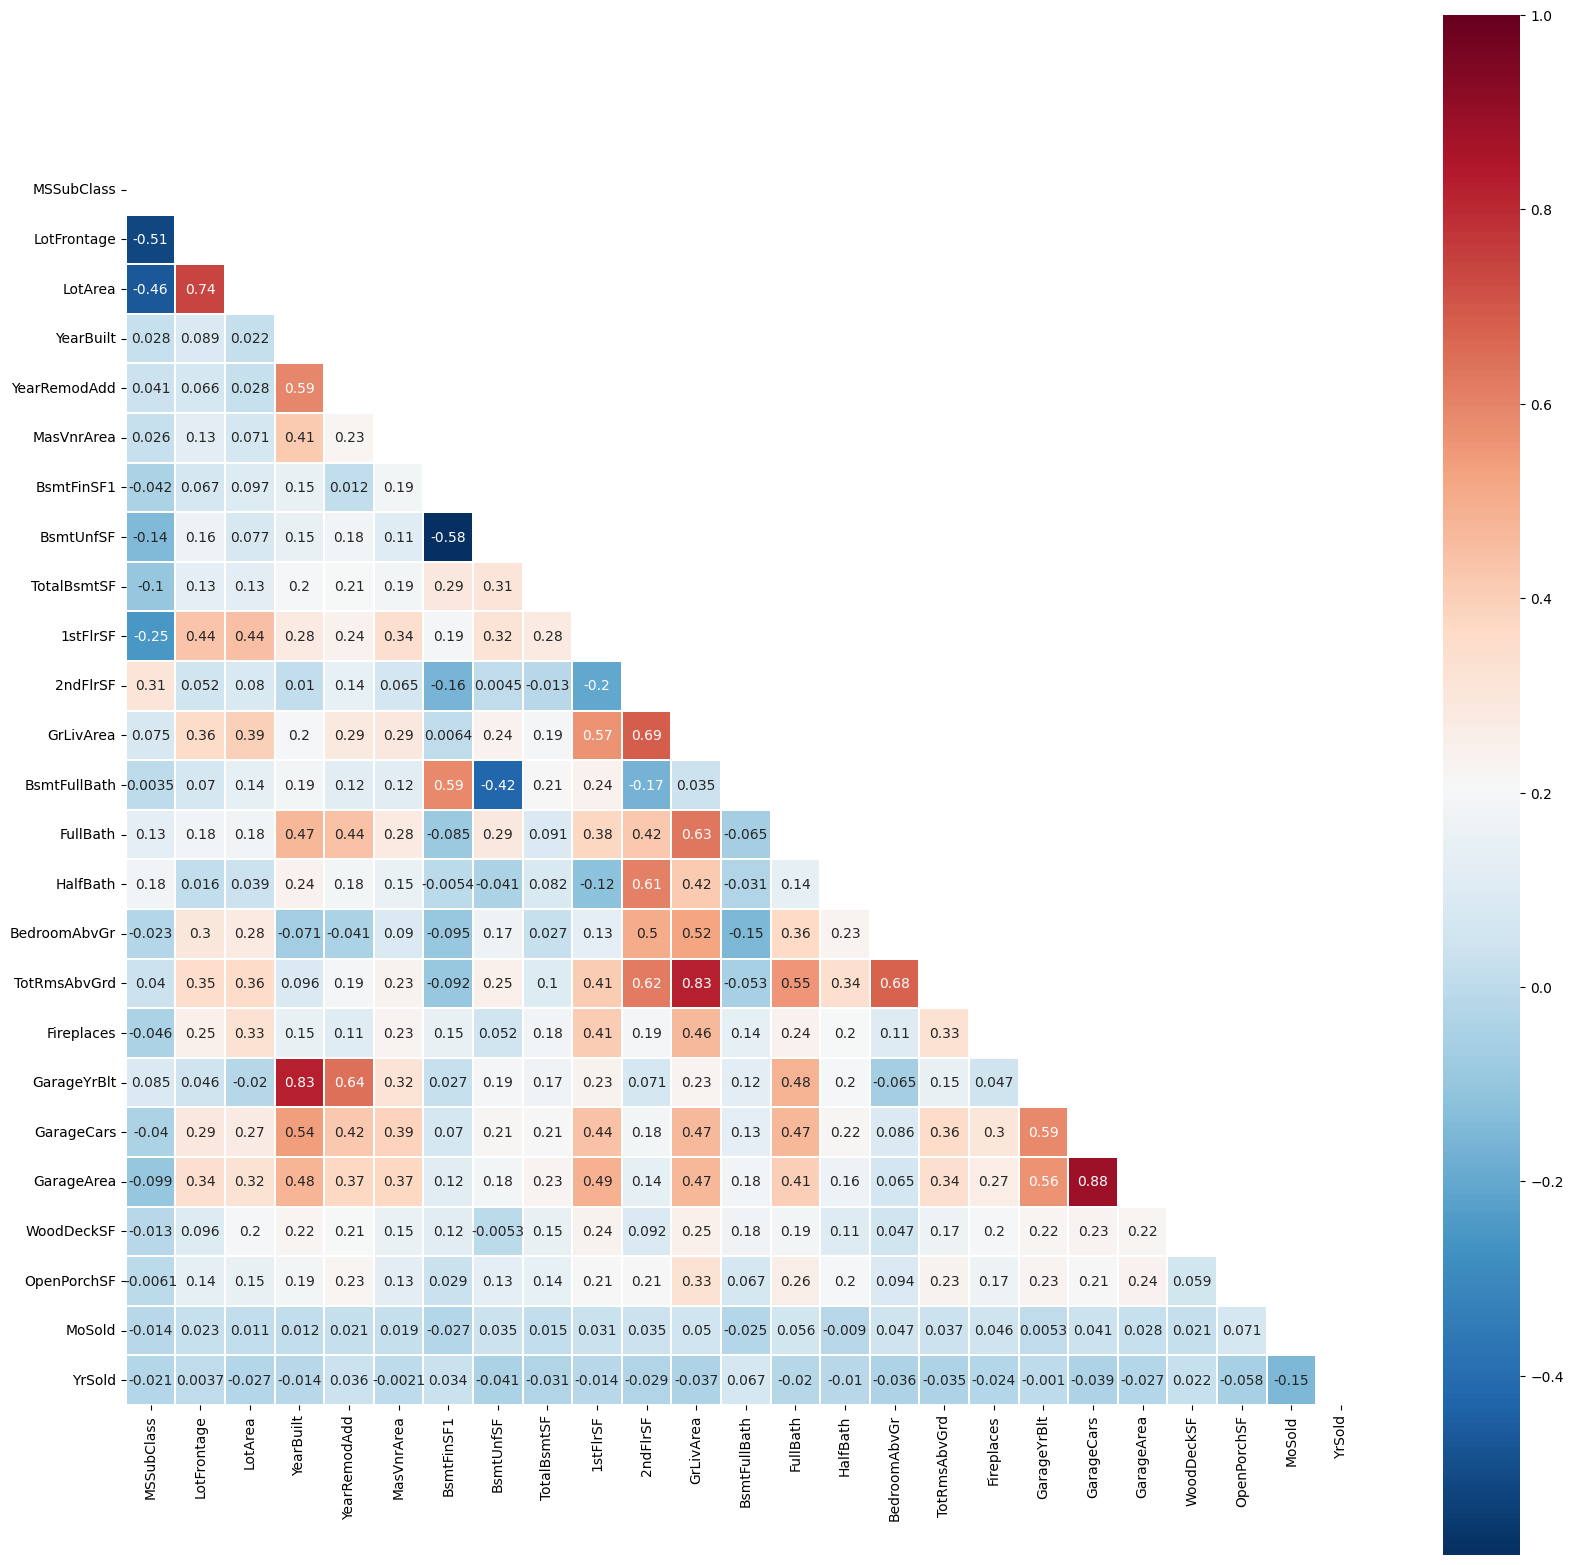

In [26]:
# Correlation check -> to collect removable features
# Using Pearson Correlation
sp_corr_hm = df[list(numericals.values)].corr()
sp_corr = sp_corr_hm.stack().reset_index()
sp_corr.columns = ['var1', 'var2', 'corr']
sp_corr[['var1', 'var2']] = np.sort(sp_corr[['var1', 'var2']], axis=1)

print(sp_corr[sp_corr['var1'] != sp_corr['var2']].drop_duplicates().sort_values(by='corr', ascending=False)[:20])

plt.figure(figsize=(20, 20))
sns.heatmap(sp_corr_hm, mask=np.triu(np.ones_like(sp_corr_hm, dtype=bool)), vmax=1, annot=True, linewidths=0.1, cmap=plt.cm.RdBu_r, square=True)
plt.show()

There are correlations exceeding 0.7 between some features. - drop *GarageYrBlt*, *GarageArea*, *LotFrontage*, and *TotRmsAbvGrd*.

In [27]:
numericals = numericals.drop(['GarageYrBlt', 'GarageArea', 'LotFrontage', 'TotRmsAbvGrd'])
df[numericals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotArea       1460 non-null   float64
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   float64
 6   BsmtUnfSF     1460 non-null   int64  
 7   TotalBsmtSF   1460 non-null   float64
 8   1stFlrSF      1460 non-null   int64  
 9   2ndFlrSF      1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  BsmtFullBath  1460 non-null   int64  
 12  FullBath      1460 non-null   int64  
 13  HalfBath      1460 non-null   int64  
 14  BedroomAbvGr  1460 non-null   int64  
 15  Fireplaces    1460 non-null   int64  
 16  GarageCars    1460 non-null   int64  
 17  WoodDeckSF    1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

In [28]:
sp_corr_hm = df[list(numericals.values)].corr()
sp_corr = sp_corr_hm.stack().reset_index()
sp_corr.columns = ['var1', 'var2', 'corr']
sp_corr[['var1', 'var2']] = np.sort(sp_corr[['var1', 'var2']], axis=1)

print(sp_corr[sp_corr['var1'] != sp_corr['var2']].drop_duplicates().sort_values(by='corr', ascending=False)[:20])

             var1          var2      corr
199      2ndFlrSF     GrLivArea  0.687501
222      FullBath     GrLivArea  0.630012
202      2ndFlrSF      HalfBath  0.609707
45      YearBuilt  YearRemodAdd  0.592855
116    BsmtFinSF1  BsmtFullBath  0.591148
178      1stFlrSF     GrLivArea  0.566024
58     GarageCars     YearBuilt  0.537850
224  BedroomAbvGr     GrLivArea  0.521270
203      2ndFlrSF  BedroomAbvGr  0.502901
268      FullBath    GarageCars  0.469672
54       FullBath     YearBuilt  0.468271
226    GarageCars     GrLivArea  0.467247
225    Fireplaces     GrLivArea  0.461679
29       1stFlrSF       LotArea  0.443873
184      1stFlrSF    GarageCars  0.439317
75       FullBath  YearRemodAdd  0.439046
201      2ndFlrSF      FullBath  0.421378
79     GarageCars  YearRemodAdd  0.420622
223     GrLivArea      HalfBath  0.415772
46     MasVnrArea     YearBuilt  0.413675


In [29]:
df[numericals].isnull().sum()

MSSubClass      0
LotArea         0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
Fireplaces      0
GarageCars      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

In [30]:
df_test[numericals].isnull().sum()

MSSubClass       0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
Fireplaces       0
GarageCars       1
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
dtype: int64

In [31]:
'''
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df['LotFrontage'].median())
'''
# Fill NaN & Modify Numericals
df[numericals] = df[numericals].fillna(0)
df_test[numericals] = df_test[numericals].fillna(0)

In [32]:
df[numericals].describe()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,9.110966,1971.267808,1984.865753,2.120264,4.229731,567.240411,6.750560,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,0.613014,1.767123,94.244521,46.660274,6.321918,2007.815753
std,42.300571,0.517369,30.202904,20.645407,2.628759,2.992052,441.866955,1.145712,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.644666,0.747315,125.338794,66.256028,2.703626,1.328095
min,20.000000,7.170888,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,8.929898,1954.000000,1967.000000,0.000000,0.000000,223.000000,6.680541,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9.156887,1973.000000,1994.000000,0.000000,5.951943,477.500000,6.900227,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,25.000000,6.000000,2008.000000
75%,70.000000,9.358976,2000.000000,2004.000000,5.107456,6.569832,808.000000,7.169542,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,168.000000,68.000000,8.000000,2009.000000
max,190.000000,12.279537,2010.000000,2010.000000,7.378384,8.638525,2336.000000,8.717846,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,4.000000,857.000000,547.000000,12.000000,2010.000000


---

### ***Categorical columns***

In [33]:
for c in categoricals:
    print(c, df[c].nunique(), df[c].unique())
    print(c, df_test[c].nunique(), df_test[c].unique())

MSZoning 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning 5 ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Street 2 ['Pave' 'Grvl']
Street 2 ['Pave' 'Grvl']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 4 ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour 4 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities 2 ['AllPub' 'NoSeWa']
Utilities 1 ['AllPub' nan]
LotConfig 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig 5 ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Neighborhood 25 ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' '

In [34]:
df[categoricals[:-2]].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


- *In Street, there are only 6 values that are not 'Pave', all 'Grvl'.*
- *Similarly, in Utilities, only one has different value - 'NoSeWa'.*
- *In Condition2, rows except 15 rows have value 'Norm'. RoofMatl is also similar. Data except 24 rows have value 'CompShg'.*
- *In Heating, most of values has 'GasA'. 32 rows have different values.*
- *Compare to others, Neighborhood, Exterior1st, Exterior2nd have many categories (exceed 10).*

In [35]:
# drop Street and Utilities, which can be unary variables while training
categoricals = [x for x in categoricals if x not in ['Street', 'Utilities']]

In [36]:
# Correlation check -> to collect removable features
# Seperate Categoricals into Ordinal/Norminal Variables
ords = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageFinish', 'GarageCond']
nmns = ['MSZoning',  'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType',
 'SaleCondition']

In [37]:
# Encoding with sklearn.preprocessing.OrdinalEncoder()

df_c = df[categoricals].copy()
df_test_c = df_test[categoricals].copy()

for c in categoricals:
    lbenc = LabelEncoder()
    df_c[c] = lbenc.fit_transform(df_c[c])
    df_test_c[c] = lbenc.fit_transform(df_test_c[c])

In [38]:
# Ordinal Variables -> Using Spearman Correlation
sp_corr_hm = df_c[ords].corr(method='spearman')
sp_corr = sp_corr_hm.stack().reset_index()
sp_corr.columns = ['var1', 'var2', 'corr']
sp_corr[['var1', 'var2']] = np.sort(sp_corr[['var1', 'var2']], axis=1)

print(sp_corr[sp_corr['var1'] != sp_corr['var2']].drop_duplicates().sort_values(by='corr', ascending=False)[:20])

             var1          var2      corr
167    GarageCond    GarageQual  0.809965
38      ExterQual   KitchenQual  0.660289
32       BsmtQual     ExterQual  0.572178
37      ExterQual     HeatingQC  0.516188
40      ExterQual  GarageFinish  0.498116
68       BsmtQual  GarageFinish  0.493347
66       BsmtQual   KitchenQual  0.472556
136     HeatingQC   KitchenQual  0.465690
65       BsmtQual     HeatingQC  0.418388
138  GarageFinish     HeatingQC  0.389091
152  GarageFinish   KitchenQual  0.386026
62   BsmtExposure      BsmtQual  0.349400
106  BsmtFinType1  BsmtFinType2  0.320479
18       BsmtQual   OverallCond  0.266694
16      ExterQual   OverallCond  0.263360
78       BsmtCond  BsmtFinType2  0.258773
181    GarageCond  GarageFinish  0.246782
96   BsmtExposure  GarageFinish  0.246688
34   BsmtExposure     ExterQual  0.236226
91   BsmtExposure  BsmtFinType1  0.228632


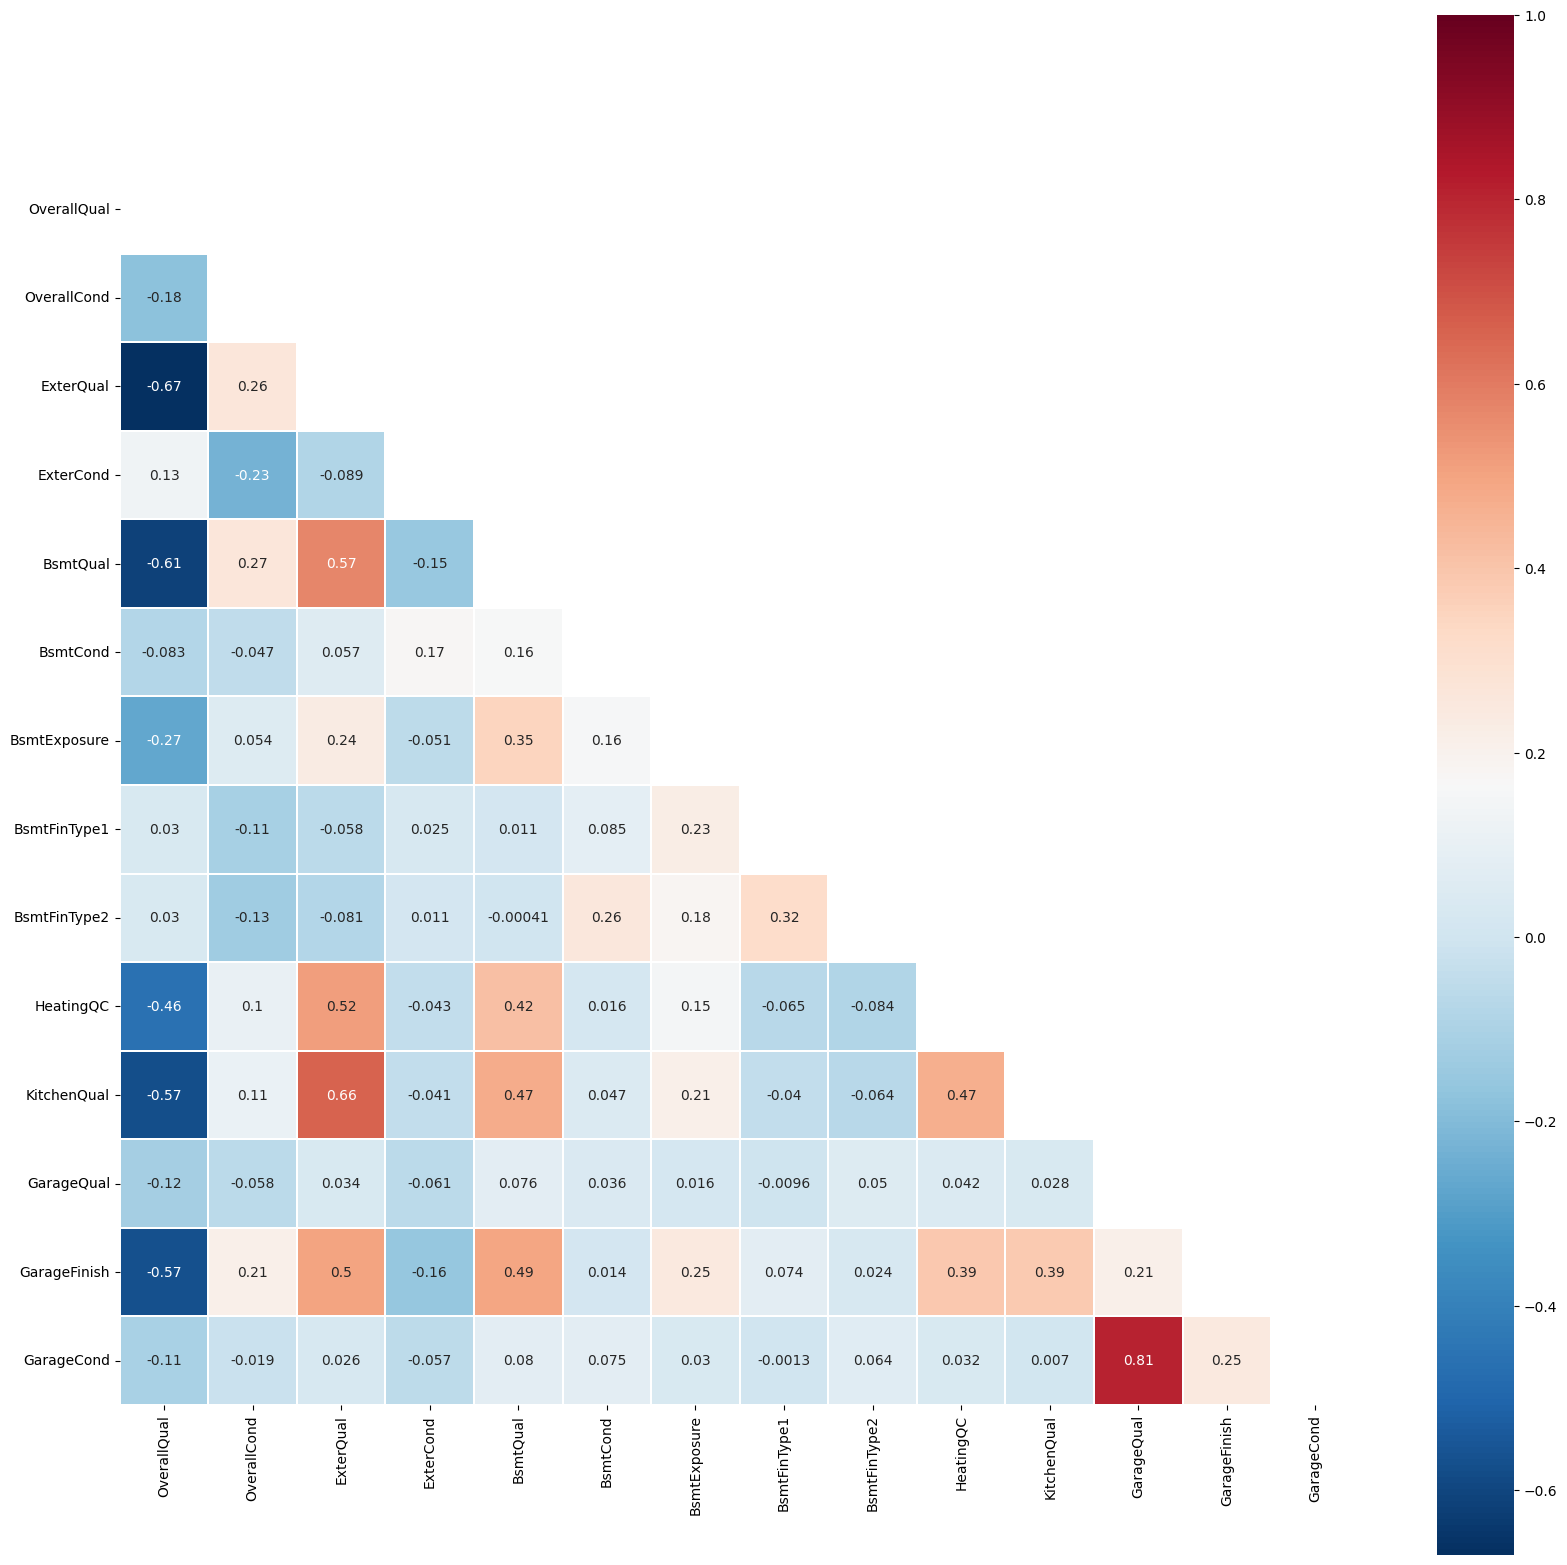

In [39]:
plt.figure(figsize=(20, 20))
sns.heatmap(sp_corr_hm, mask=np.triu(np.ones_like(sp_corr_hm, dtype=bool)), vmax=1, annot=True, linewidths=0.1, cmap=plt.cm.RdBu_r, square=True)
plt.show()

In [40]:
# Norminal Variables -> Using Cramer's V Correlation
def crm_v(v1, v2):
    ctab = np.array(pd.crosstab(v1, v2, rownames=None, colnames=None))
    st = stats.chi2_contingency(ctab)[0]
    obs = np.sum(ctab)
    c, h = ctab.shape
    res = max(0, (st / obs) - (((h - 1) * (c - 1)) / (obs - 1)))
    return np.sqrt(res / min((h - ((h-1)**2)/(obs-1) - 1), (c - ((c-1)**2)/(obs-1) - 1)))

In [41]:
sp = df_c[nmns]
sp_corr = []

for a in sp:
    tmp = []
    for b in sp:
        tmp.append(round(crm_v(sp[a], sp[b]), 6))
    sp_corr.append(tmp)
    
sp_corr_hm = pd.DataFrame(sp_corr, columns = sp.columns, index = sp.columns)

In [42]:
sp_corr = sp_corr_hm.stack().reset_index()
sp_corr.columns = ['var1', 'var2', 'corr']
sp_corr[['var1', 'var2']] = np.sort(sp_corr[['var1', 'var2']], axis=1)

print(sp_corr[sp_corr['var1'] != sp_corr['var2']].drop_duplicates().sort_values(by='corr', ascending=False)[:20])

              var1          var2      corr
289    Exterior1st   Exterior2nd  0.758884
5         MSZoning  Neighborhood  0.640629
505  SaleCondition      SaleType  0.470819
361     CentralAir       Heating  0.460820
241       RoofMatl     RoofStyle  0.458024
50     LandContour     LandSlope  0.457249
385     CentralAir    Electrical  0.420445
123       BldgType  Neighborhood  0.418752
129     Foundation  Neighborhood  0.417266
131     CentralAir  Neighborhood  0.382148
338     CentralAir    Foundation  0.365005
387     CentralAir    GarageType  0.360283
51     LandContour  Neighborhood  0.359864
292     CentralAir   Exterior1st  0.348793
388     CentralAir    PavedDrive  0.335635
315     CentralAir   Exterior2nd  0.330415
128    Exterior2nd  Neighborhood  0.317412
97       LandSlope  Neighborhood  0.315128
290    Exterior1st    Foundation  0.314597
313    Exterior2nd    Foundation  0.313956


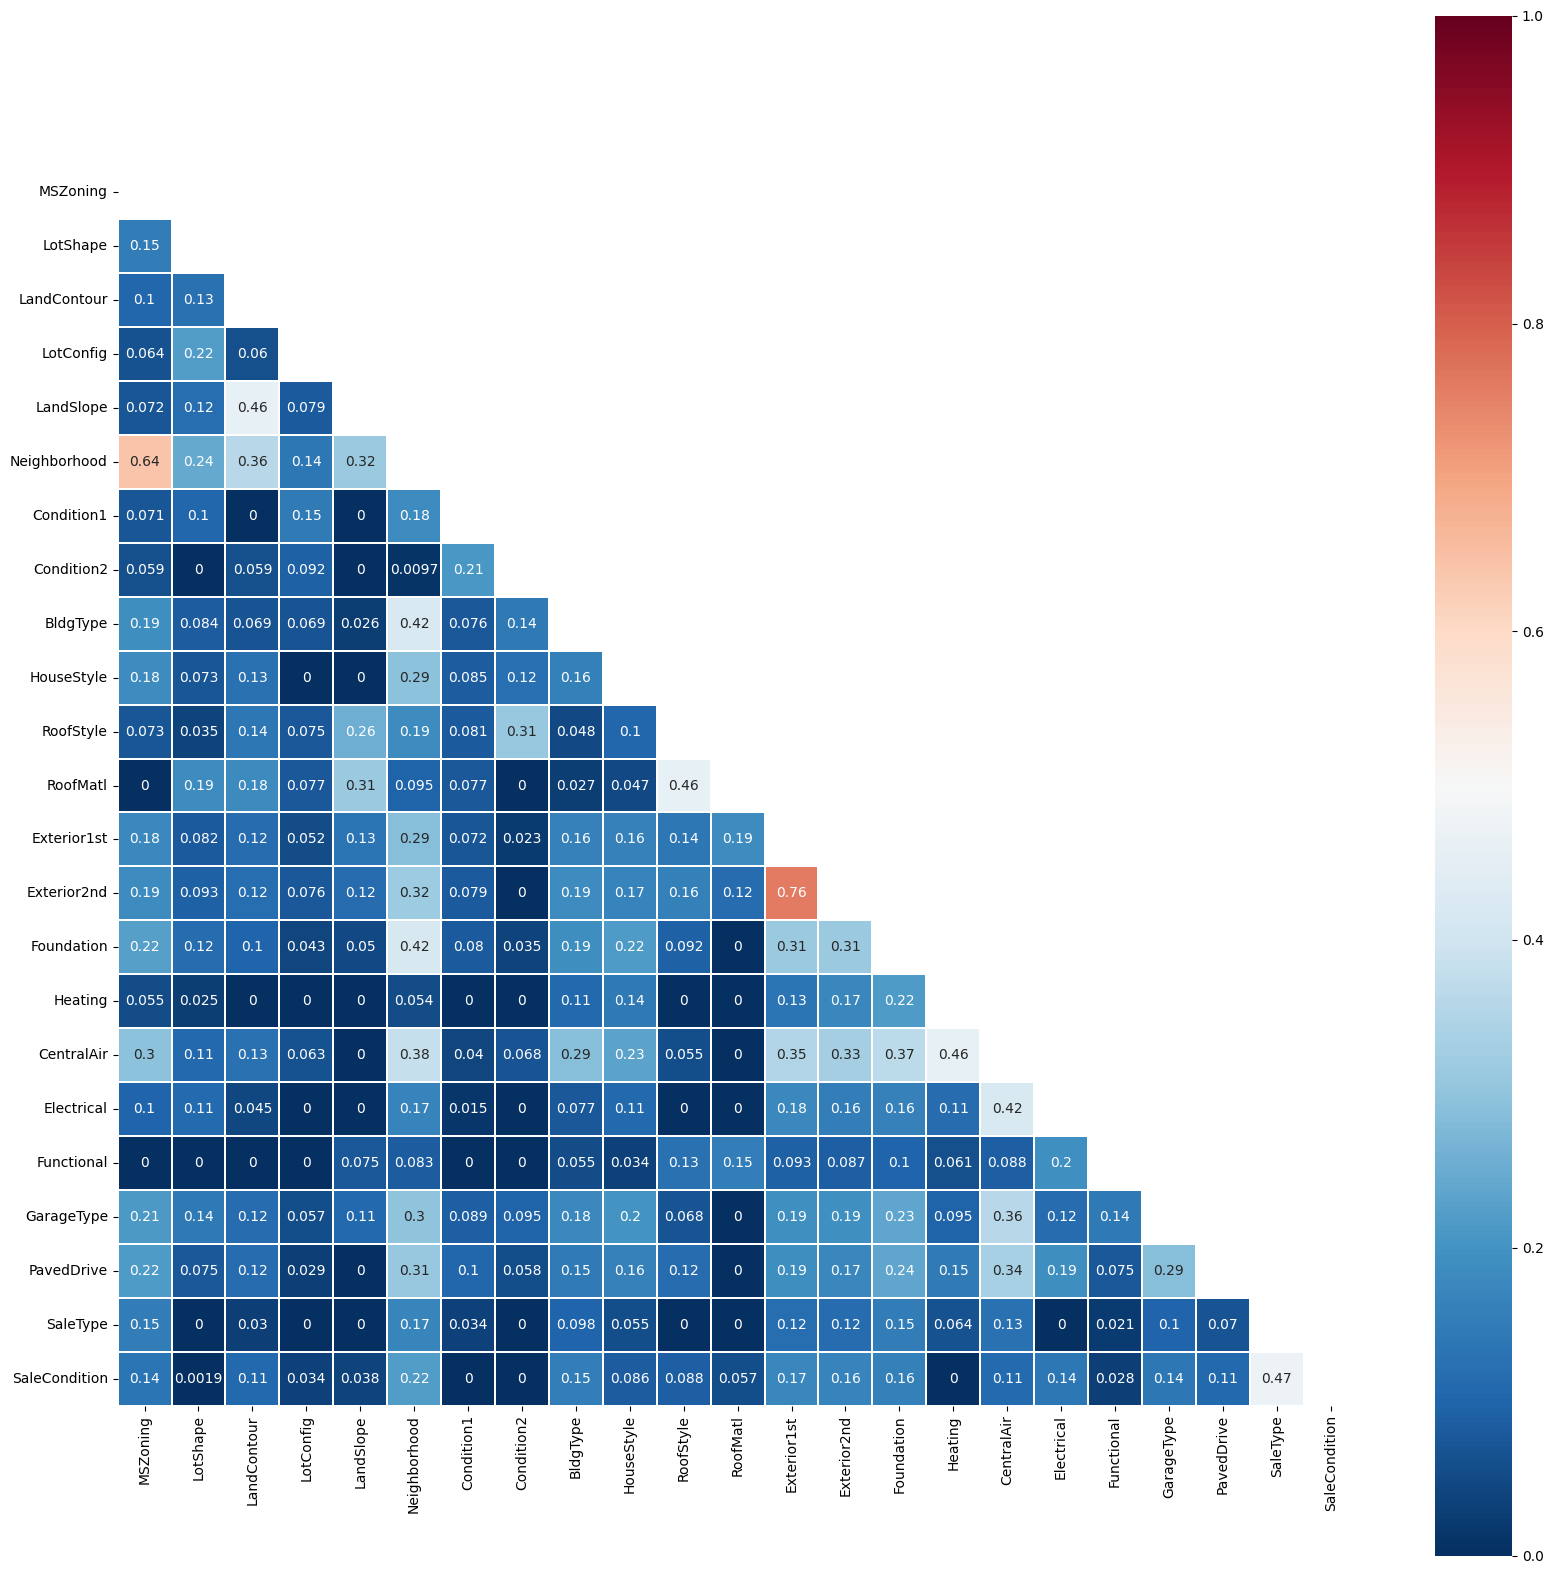

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(sp_corr_hm, mask=np.triu(np.ones_like(sp_corr_hm, dtype=bool)), vmax=1, annot=True, linewidths=0.1, cmap=plt.cm.RdBu_r, square=True)
plt.show()

In [44]:
# drop
categoricals.remove('GarageCond')
categoricals.remove('Exterior2nd')

In [45]:
df[categoricals].isnull().sum()

MSZoning          0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
PavedDrive        0
SaleType          0
SaleCondition     0
OverallQual       0
OverallCond       0
dtype: int64

In [46]:
df_test[categoricals].isnull().sum()

MSZoning          4
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
PavedDrive        0
SaleType          1
SaleCondition     0
OverallQual       0
OverallCond       0
dtype: int64

In [47]:
# Fill NaN & Modify Data
mf_list = ['Electrical', 'MSZoning', 'Functional']
imp = SimpleImputer(strategy='most_frequent')
df[mf_list] = imp.fit_transform(df[mf_list])
df_test[mf_list] = imp.fit_transform(df_test[mf_list])

# Based on data description and unique(), I guessed that Nan values of 'Bsmt' and 'Garage' might be 'NA'.
lst = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual']
df[lst] = df[lst].fillna('NA')
df_test[lst] = df_test[lst].fillna('NA')

In [48]:
print(df['ExterCond'].value_counts().sort_values(ascending=False))
print(df['ExterQual'].value_counts().sort_values(ascending=False))

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


In [49]:
print(df.loc[(df.ExterQual == 'TA') & (df.ExterCond == 'TA')]['Exterior1st'].value_counts())

Exterior1st
HdBoard    163
Wd Sdng    150
MetalSd    136
VinylSd    134
Plywood     83
BrkFace     35
CemntBd     21
WdShing     19
AsbShng     17
Stucco      12
BrkComm      1
AsphShn      1
Stone        1
Name: count, dtype: int64


In [50]:
df_test['Exterior1st'].fillna('HdBoard', inplace=True)

In [51]:
print(df['KitchenQual'].mode())
print(df['SaleType'].mode())

0    TA
Name: KitchenQual, dtype: object
0    WD
Name: SaleType, dtype: object


In [52]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')
df_test['SaleType'] = df_test['SaleType'].fillna('WD')

In [53]:
df[categoricals].isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
SaleType         0
SaleCondition    0
OverallQual      0
OverallCond      0
dtype: int64

In [54]:
df_test[categoricals].isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
SaleType         0
SaleCondition    0
OverallQual      0
OverallCond      0
dtype: int64

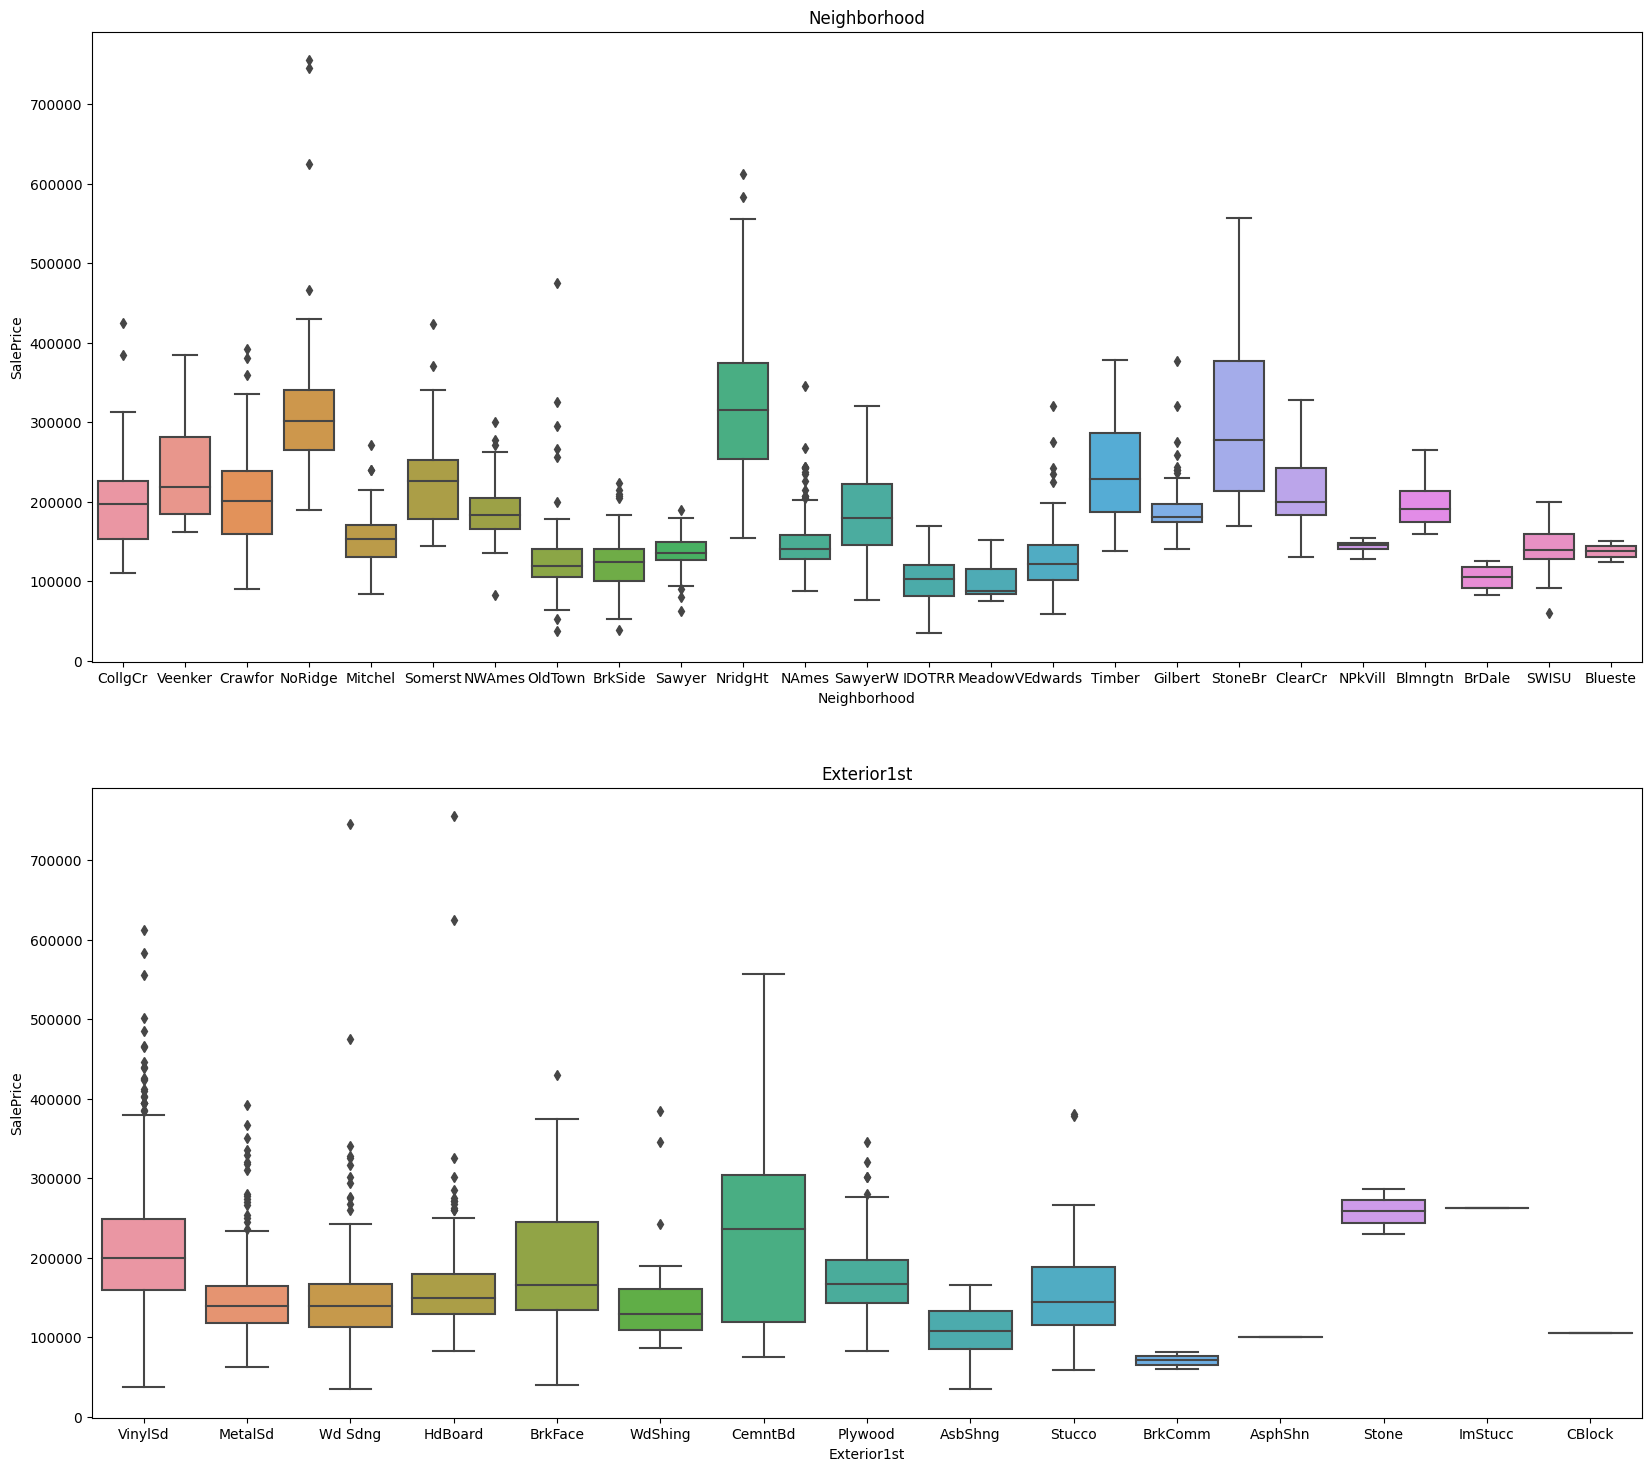

In [55]:
# To see much easier, seperate features that have many categories and print plot
f, ax = plt.subplots(2, 1, figsize=(20, 18))
for idx, c in enumerate(['Neighborhood', 'Exterior1st']):
    sns.boxplot(data=df, x=c, y='SalePrice', ax=ax[idx])
    ax[idx].set_title(f"{c}")
    
plt.show()

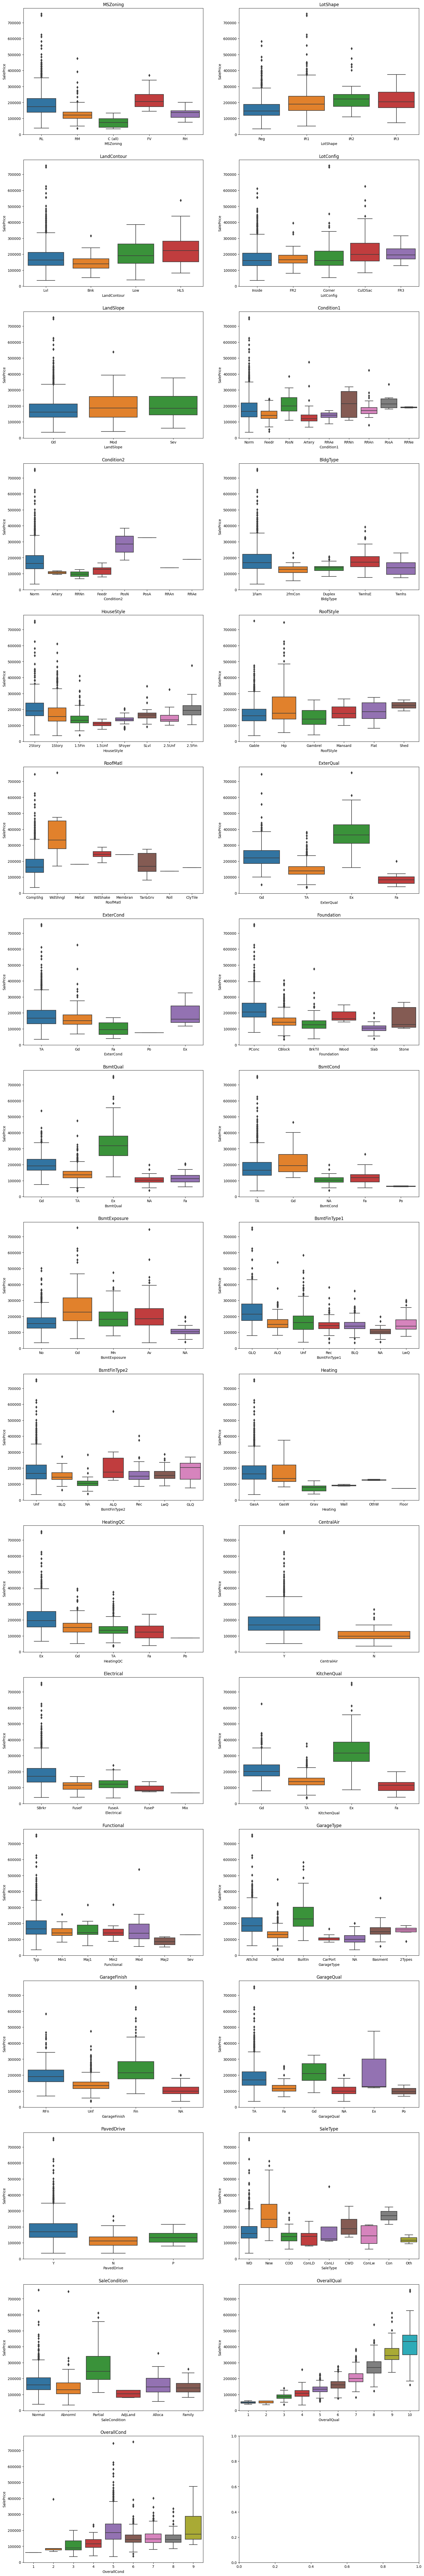

In [56]:
f, ax = plt.subplots(math.ceil((len(categoricals)-2) / 2), 2, figsize=(20, 130))

for idx, c in enumerate([x for x in categoricals if x not in ['Neighborhood', 'Exterior1st']]):
    a, b = divmod(idx, 2)
    sns.boxplot(data=df, x=c, y='SalePrice', ax=ax[a, b])
    ax[a, b].set_title(f"{c}")
    
plt.show()

In [57]:
# Encoding with sklearn.preprocessing.OrdinalEncoder()
for c in categoricals:
    lbenc = LabelEncoder()
    df[c] = lbenc.fit_transform(df[c])
    df_test[c] = lbenc.fit_transform(df_test[c])

---

In [58]:
# Stadardization
for n in numericals:
    mn, std = df[n].mean(axis=0), df[n].std(axis=0)
    df[n] = (df[n] - mn) / std
    df_test[n] = (df_test[n] - mn) / std

In [59]:
df_after_pp = df[categoricals + list(numericals) + ['SalePrice']]
df_test_after_pp = df_test[categoricals + list(numericals)]

In [60]:
# One-hot Encoding
ct_df = pd.get_dummies(data=df[categoricals], drop_first=True, columns=categoricals)
ct_df_test = pd.get_dummies(data=df_test[categoricals], drop_first=True, columns=categoricals)

ct_df = ct_df.astype(int)
ct_df_test = ct_df_test.astype(int)

In [61]:
df_after_pp = pd.concat([ct_df, df[list(numericals) + ['SalePrice']]], axis=1)
df_test_after_pp = pd.concat([ct_df_test, df_test[list(numericals)]], axis=1)

In [62]:
[x for x in df_after_pp.columns if x not in df_test_after_pp]

['Condition2_5',
 'Condition2_6',
 'Condition2_7',
 'HouseStyle_7',
 'RoofMatl_4',
 'RoofMatl_5',
 'RoofMatl_6',
 'RoofMatl_7',
 'Exterior1st_13',
 'Exterior1st_14',
 'Heating_4',
 'Heating_5',
 'Electrical_4',
 'GarageQual_5',
 'SalePrice']

In [63]:
new_col = ['Condition2_5', 'Condition2_6', 'Condition2_7', 'HouseStyle_7', 'RoofMatl_4', 'RoofMatl_5', 'RoofMatl_6', 'RoofMatl_7', 'Exterior1st_13', 'Exterior1st_14', 'Heating_4', 'Heating_5', 'Electrical_4', 'GarageQual_5']

for col in new_col:
    df_test_after_pp[col] = 0
    
df_test_after_pp = df_test_after_pp[list(df_after_pp.columns)[:-1]]

In [64]:
df_after_pp

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_1,Electrical_1,Electrical_2,Electrical_3,Electrical_4,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,PavedDrive_1,PavedDrive_2,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.073350,-0.133225,1.050634,0.878367,1.203206,0.779164,-0.944267,0.002512,-0.793162,1.161454,0.370207,1.107431,0.789470,1.227165,0.163723,-0.950901,0.311618,-0.751918,0.216429,-1.598563,0.138730,208500
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.872264,0.113374,0.156680,-0.429430,-0.806564,0.887953,-0.641008,0.340998,0.257052,-0.794891,-0.482347,-0.819684,0.789470,-0.761360,0.163723,0.600289,0.311618,1.6

In [65]:
df_test_after_pp

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_1,Electrical_1,Electrical_2,Electrical_3,Electrical_4,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,PavedDrive_1,PavedDrive_2,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.872264,0.482779,-0.339961,-1.155984,-0.806564,0.641991,-0.672692,0.028598,-0.689693,-0.794891,-1.178852,-0.819684,-1.025689,-0.761360,-1.062101,-0.950901,-1.026506,0.365054,-0.704242,-0.119069,1.644646
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-0.872264,0.879079,-0.439289,-1.301294,0.978060,0.868628,-0.364907,0.386113,0.430364,-0.794891,-0.354844,-0.819684,-1.025689,1.227165,0.163723,-0.950901,-1.026506,2.383583

---

***ML***

In [66]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras import models, layers
from sklearn.metrics import accuracy_score

In [67]:
X = df_after_pp.drop('SalePrice', axis=1).copy()
y = df_after_pp['SalePrice'].copy()

***Decision Tree***

In [68]:
dt = DecisionTreeRegressor(random_state=1)

In [69]:
dt.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [70]:
final_pred_dt = dt.predict(df_test_after_pp)

In [71]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_dt
submission.to_csv('/kaggle/working/dt_submission.csv', index=False)

----

In [72]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

***CatBoostRegressor***

In [73]:
from catboost import CatBoostRegressor

In [74]:
cb = CatBoostRegressor(loss_function='RMSE', verbose=0)
cb.fit(X_tr, y_tr)
scores = cross_val_score(cb, X_val, y_val, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores
print(rmse_scores.mean())

27161.4007282305


In [75]:
final_pred_cb = cb.predict(df_test_after_pp)

In [76]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_cb
submission.to_csv('/kaggle/working/cb_submission.csv', index=False)

---

***XGBoost***

In [77]:
import xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=1)
xgb.fit(X_tr, y_tr, eval_metric='rmse')
scores = cross_val_score(xgb, X_val, y_val, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores
print(rmse_scores.mean())
final_pred_xgb = xgb.predict(df_test_after_pp)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


32131.61326590779


In [78]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_xgb
submission.to_csv('/kaggle/working/xgb_submission.csv', index=False)

---

***Model Build***

In [79]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='Adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

In [80]:
hist = model.fit(X_tr, y_tr, epochs=500, verbose=2, validation_data=[X_val, y_val])

Epoch 1/500
32/32 - 1s - loss: 38866386944.0000 - root_mean_squared_error: 197145.5938 - val_loss: 39430586368.0000 - val_root_mean_squared_error: 198571.3594 - 1s/epoch - 41ms/step
Epoch 2/500
32/32 - 0s - loss: 38845739008.0000 - root_mean_squared_error: 197093.2188 - val_loss: 39386345472.0000 - val_root_mean_squared_error: 198459.9375 - 108ms/epoch - 3ms/step
Epoch 3/500
32/32 - 0s - loss: 38756954112.0000 - root_mean_squared_error: 196867.8594 - val_loss: 39235104768.0000 - val_root_mean_squared_error: 198078.5312 - 108ms/epoch - 3ms/step
Epoch 4/500
32/32 - 0s - loss: 38513844224.0000 - root_mean_squared_error: 196249.4375 - val_loss: 38883565568.0000 - val_root_mean_squared_error: 197189.1562 - 103ms/epoch - 3ms/step
Epoch 5/500
32/32 - 0s - loss: 38019289088.0000 - root_mean_squared_error: 194985.3594 - val_loss: 38233767936.0000 - val_root_mean_squared_error: 195534.5625 - 103ms/epoch - 3ms/step
Epoch 6/500
32/32 - 0s - loss: 37179764736.0000 - root_mean_squared_error: 192820.

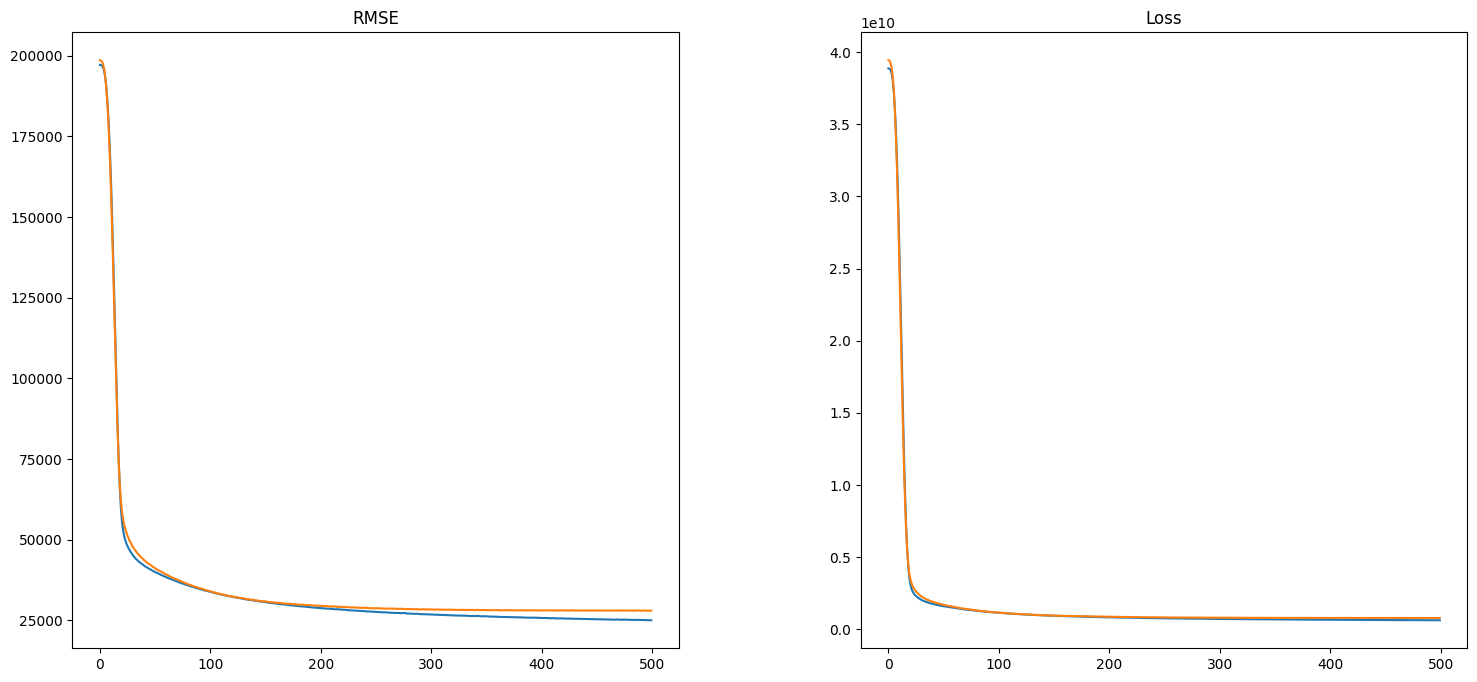

In [81]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.lineplot(hist.history['root_mean_squared_error'], ax=ax[0])
sns.lineplot(hist.history['val_root_mean_squared_error'], ax=ax[0])
ax[0].set_title("RMSE")

sns.lineplot(hist.history['loss'], ax=ax[1])
sns.lineplot(hist.history['val_loss'], ax=ax[1])
ax[1].set_title("Loss")

plt.subplots_adjust(wspace=0.3)
plt.show()

In [82]:
final_pred_md = model.predict(df_test_after_pp)

46/46 [==============================] - 0s 1ms/step


In [83]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_md
submission.to_csv('/kaggle/working/md_submission.csv', index=False)

------------------------

***Random Forest***

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_tr, y_tr)
scores = cross_val_score(rf, X_val, y_val, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores
print(rmse_scores.mean())

29693.67988526813


In [86]:
final_pred_rf = rf.predict(df_test_after_pp)

In [87]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_rf
submission.to_csv('/kaggle/working/rf_submission.csv', index=False)

------------------------
***Ensemble***

In [88]:
from sklearn.ensemble import VotingRegressor

In [89]:
vr = VotingRegressor(estimators=[('DT', DecisionTreeRegressor(random_state=1)), ('CB', CatBoostRegressor(loss_function='RMSE', verbose=0)), ('XGB', XGBRegressor(random_state=1)), ('RF', RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1))]).fit(X_tr, y_tr)
scores = cross_val_score(vr, X_val, y_val, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores
print(rmse_scores.mean())

29620.011740119942


In [90]:
final_pred_vr = vr.predict(df_test_after_pp)

In [91]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = final_pred_vr
submission.to_csv('/kaggle/working/vr_submission.csv', index=False)